<a href="https://colab.research.google.com/github/MateusA-Borges/mushroom-classification-project-senac-UC9/blob/main/Project_Mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression, SGDRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyClassifier

train_df = pd.read_csv('/content/train mushrooms.csv') # change to where your data is located
test_df = pd.read_csv('/content/test mushrooms.csv') # change to where your data is located

print(f"Treino: {train_df.shape}, Teste: {test_df.shape}")

Treino: (6499, 24), Teste: (1625, 23)


In [ ]:
# @title Objetivo: Criar uma validação interna para desenvolvimento iterativo do modelo sem usar o conjunto de teste final.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# PROCESSO DE PREPARAÇÃO DOS DADOS
train = train_df.drop("id", axis=1)
test_ids = test_df["id"]
test = test_df.drop("id", axis=1)

print("IDs removidos")

print("\n2 SEPARANDO DADOS DE TREINO (X) E RESPOSTAS (y)")

X_train = train.drop("class", axis=1)
y_train = train["class"]
X_test = test

print(f" X_train (características): {X_train.shape}")
print(f" y_train (respostas): {y_train.shape}")
print(f" X_test (teste): {X_test.shape}")

print("\n CONVERTENDO TEXTO EM NÚMEROS")

encoder = OneHotEncoder(sparse_output=False)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

print(f" Após conversão:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

print("\n PRONTO! Dados preparados para o modelo!")


# Dividir os dados em treino e validação
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
     X_train, y_train, test_size=0.2, random_state=42
)
print(f"Split: Treino {X_train_split.shape}, Validação {X_val_split.shape}")

#Estratégia:
#Dividimos os dados de treino originais em dois conjuntos:
#80% para Treino: Desenvolvimento e ajuste do modelo
#20% para Validação: Teste durante o desenvolvimento


IDs removidos

2 SEPARANDO DADOS DE TREINO (X) E RESPOSTAS (y)
 X_train (características): (6499, 22)
 y_train (respostas): (6499,)
 X_test (teste): (1625, 22)

 CONVERTENDO TEXTO EM NÚMEROS
 Após conversão:
X_train: (6499, 117)
X_test: (1625, 117)

 PRONTO! Dados preparados para o modelo!
Split: Treino (5199, 117), Validação (1300, 117)


In [ ]:
#@title CÓDIGO DE DIVISÃO DE DADOS


from sklearn.model_selection import train_test_split

print("DIVISÃO PARA TESTE RÁPIDO")
print("=" * 40)

X_treino, X_val, y_treino, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42
)

print(f"Treino: {X_treino.shape}, Validação: {X_val.shape}")

#Este código realiza uma divisão estratégica dos dados de treino para
#criar um conjunto de validação interno durante o desenvolvimento do modelo
#de machine learning.

#Funcionamento detalhado:

#Divisão dos dados: Separa os dados de treino originais (X_train e y_train)
#em dois grupos distintos:


DIVISÃO PARA TESTE RÁPIDO
Treino: (5199, 117), Validação: (1300, 117)


In [ ]:
# @title PROCESSO DE PREPARAÇÃO DOS DADOS
train = train_df.drop("id", axis=1)


test_ids = test_df["id"]
test = test_df.drop("id", axis=1)

print("IDs removidos")

print("\n2 SEPARANDO DADOS DE TREINO (X) E RESPOSTAS (y)")


X_train = train.drop("class", axis=1)
y_train = train["class"]
X_test = test

print(f" X_train (características): {X_train.shape}")
print(f" y_train (respostas): {y_train.shape}")
print(f" X_test (teste): {X_test.shape}")

print("\n CONVERTENDO TEXTO EM NÚMEROS")

from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

print(f" Após conversão:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

print("\n PRONTO! Dados preparados para o modelo!")


#LIMPEZA INICIAL
#Removemos a coluna 'id' dos dados de treino porque é apenas um identificador e não ajuda nas previsões
#Guardamos os 'ids' do teste separadamente para usar na submissão final
#SEPARAÇÃO DOS DADOS
#X_train: São as características do jogo (todas as colunas exceto 'class') - o que o modelo usa para aprender
#y_train: São as respostas (apenas a coluna 'class') - o que o modelo precisa prever
#X_test: São os dados de teste onde aplicaremos o modelo treinado
#TRANSFORMAÇÃO DOS DADOS
#Convertemos as letras ('x', 'o') em números usando One-Hot Encoding
#O encoder "aprende" com os dados de treino e depois aplica a mesma transformação nos dados de teste
#RESULTADO FINAL:
#Dados totalmente numéricos e padronizados, prontos para alimentar qualquer algoritmo de Machine Learning!

IDs removidos

2 SEPARANDO DADOS DE TREINO (X) E RESPOSTAS (y)
 X_train (características): (6499, 22)
 y_train (respostas): (6499,)
 X_test (teste): (1625, 22)

 CONVERTENDO TEXTO EM NÚMEROS
 Após conversão:
X_train: (6499, 117)
X_test: (1625, 117)

 PRONTO! Dados preparados para o modelo!


In [ ]:
#@title ONE-HOT ENCODING. Cada categoria vira uma coluna numérica, permitindo que algoritmos como regressão linear e redes neurais processem os dados adequadamente.
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

print(f"Após codificação:")
print(f"X_train: {X_train_encoded.shape}")
print(f"X_test: {X_test_encoded.shape}")

Após codificação:
X_train: (6499, 233)
X_test: (1625, 233)


Feature: 0, Score: 0.44166
Feature: 1, Score: 0.39218
Feature: 2, Score: -0.08721
Feature: 3, Score: 0.04069
Feature: 4, Score: -0.57380
Feature: 5, Score: -0.12764
Feature: 6, Score: -0.80476
Feature: 7, Score: 0.72938
Feature: 8, Score: 0.24437
Feature: 9, Score: -0.08310
Feature: 10, Score: 0.93992
Feature: 11, Score: -0.88111
Feature: 12, Score: 0.08964
Feature: 13, Score: 0.05344
Feature: 14, Score: -0.29642
Feature: 15, Score: 0.86777
Feature: 16, Score: -0.34433
Feature: 17, Score: -0.41673
Feature: 18, Score: 0.44228
Feature: 19, Score: -0.36857
Feature: 20, Score: 0.02468
Feature: 21, Score: 0.06121
Feature: 22, Score: -2.67460
Feature: 23, Score: 2.59413
Feature: 24, Score: 2.77346
Feature: 25, Score: -2.63474
Feature: 26, Score: 0.33709
Feature: 27, Score: -4.01454
Feature: 28, Score: 2.13101
Feature: 29, Score: 0.79660
Feature: 30, Score: 0.77749
Feature: 31, Score: -0.10370
Feature: 32, Score: 0.18959
Feature: 33, Score: 1.68003
Feature: 34, Score: -1.59414
Feature: 35, Sc

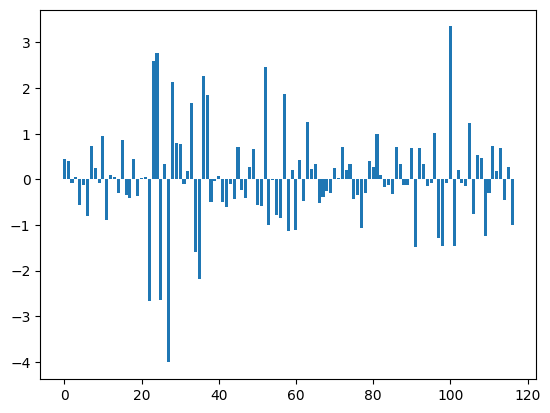

In [ ]:
#@title Logistic Regression Model
train = pd.read_csv("/content/drive/MyDrive/train.csv")

# fazer o drop `id` do dataset train, ja que nao é necessario
train = train.drop(["id"], axis=1)

# separar X and y
X_train = train.drop(["class"], axis=1)
y_train = train["class"]

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform train data
X_train = encoder.fit_transform(X_train)


# logistic regression para importancia das features
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# definir o modelo
model = LogisticRegression()
# fitar o model
model.fit(X_train, y_train)
# descobrir importancia
importance = model.coef_[0]
# sumarizar importancia das features
for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
# plotar importancia das features
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# nome original das features
original_features = encoder.feature_names_in_

# pegar os nomes das features do encoder para as features codificadas
encoded_feature_names = encoder.get_feature_names_out(original_features)

# mapear o index da features codificada ao nome original da feature
encoded_to_original_feature = {}
for i, encoded_name in enumerate(encoded_feature_names):
    for original_feature in original_features:
        if encoded_name.startswith(original_feature + '_'):
            encoded_to_original_feature[i] = original_feature
            break
    # precaver casos onde o nome da feature pode nao começar com o nome original
    if i not in encoded_to_original_feature:
         encoded_to_original_feature[i] = 'unknown_feature'


# criar um discionario para armezenar a importancia de cada feature original
feature_importance_dict = {}

# iterar por meio de índices de recursos codificados e suas pontuações de importância
for i, score in enumerate(importance):
    original_feature = encoded_to_original_feature[i]
    if original_feature not in feature_importance_dict:
        feature_importance_dict[original_feature] = []
    feature_importance_dict[original_feature].append(abs(score))

# calcular importancia absoluta media para cade feature original
average_importance = {feature: np.mean(scores) for feature, scores in feature_importance_dict.items()}

# organizar as features pelo seus valoress de importancia media
sorted_importance = sorted(average_importance.items(), key=lambda item: item[1], reverse=True)

# resumir a importância da feature por coluna original
print("Average Absolute Feature Importance (Original Column, Score):")
for feature, score in sorted_importance:
    print(f'Feature: {feature}, Average Absolute Score: {score:.5f}')



Average Absolute Feature Importance (Original Column, Score):
Feature: gill-size, Average Absolute Score: 2.22319
Feature: odor, Average Absolute Score: 2.08152
Feature: gill-spacing, Average Absolute Score: 1.63709
Feature: stalk-surface-above-ring, Average Absolute Score: 1.00864
Feature: spore-print-color, Average Absolute Score: 1.00583
Feature: stalk-root, Average Absolute Score: 0.97159
Feature: stalk-surface-below-ring, Average Absolute Score: 0.81650
Feature: population, Average Absolute Score: 0.72765
Feature: ring-type, Average Absolute Score: 0.66684
Feature: stalk-shape, Average Absolute Score: 0.61142
Feature: habitat, Average Absolute Score: 0.51606
Feature: stalk-color-below-ring, Average Absolute Score: 0.48333
Feature: gill-color, Average Absolute Score: 0.47745
Feature: cap-color, Average Absolute Score: 0.47002
Feature: cap-surface, Average Absolute Score: 0.46540
Feature: stalk-color-above-ring, Average Absolute Score: 0.32969
Feature: veil-color, Average Absolute S

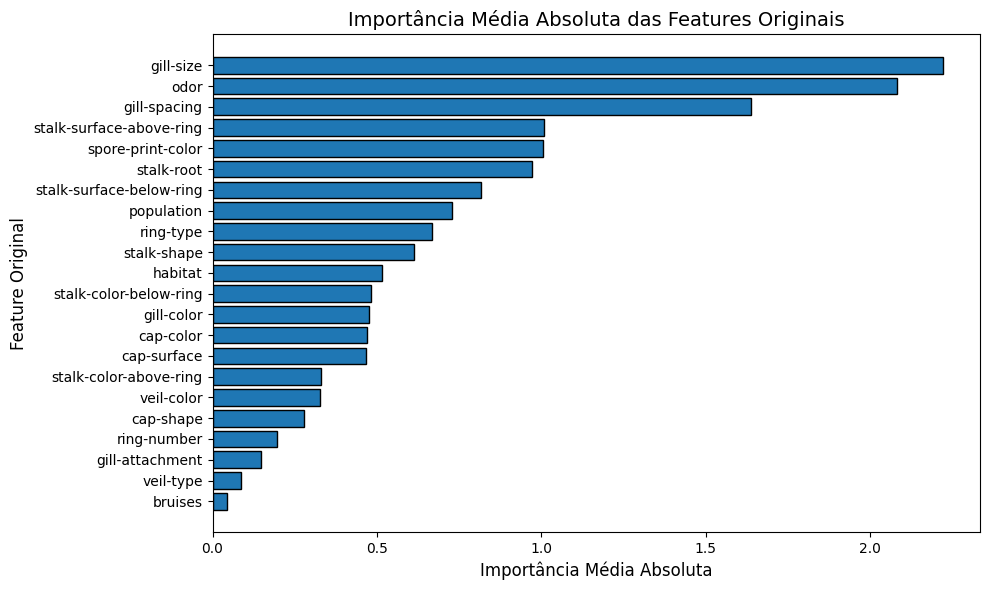

In [ ]:
# ordenar novamente por importância
sorted_importance = sorted(average_importance.items(), key=lambda item: item[1], reverse=True)

# separar nomes e valores
features = [item[0] for item in sorted_importance]
scores = [item[1] for item in sorted_importance]

# --- PLOTAR O GRÁFICO ---
plt.figure(figsize=(10, 6))
plt.barh(features, scores, edgecolor='black')
plt.gca().invert_yaxis()  # mais importantes no topo
plt.title('Importância Média Absoluta das Features Originais', fontsize=14)
plt.xlabel('Importância Média Absoluta', fontsize=12)
plt.ylabel('Feature Original', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#@title Dummy Model
print("\n CRIANDO MODELO BASELINE (ALEATÓRIO)...")

dummy_model = DummyClassifier(strategy="stratified", random_state=42)
dummy_model.fit(X_train_encoded, y_train)

# Avaliar baseline
baseline_score = dummy_model.score(X_train_encoded, y_train)
print(f" Baseline (previsões aleatórias): {baseline_score:.1%}")

#Primeiro, foi criado um modelo baseline - que é como um 'chute educado'.
#O DummyClassifier não usa inteligência artificial de verdade, ele simplesmente faz previsões aleatórias baseadas na distribuição das classes que existem nos dados.
#Qualquer modelo inteligente que criarmos depois precisa ser melhor que isso. Se nosso modelo sofisticado não superar esse resultado básico, significa que algo está errado.


 CRIANDO MODELO BASELINE (ALEATÓRIO)...
 Baseline (previsões aleatórias): 49.1%


In [ ]:
#@title Logistic Regression (menos features)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# listar as features importantes
selected_features = ['gill-size', 'odor', 'gill-spacing', 'stalk-surface-above-ring', 'spore-print-color', 'stalk-root', 'stalk-surface-below-ring', 'population', 'ring-type', 'stalk-shape', 'habitat']

# separar features (x) e target (y)
X = train[selected_features]
y = train['class']

# One-hot encode as features antes da divisao
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)
encoded_cols = encoder.get_feature_names_out(X.columns)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)


# dividir os dados em sets de treino e test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# avaliar o modelo
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9992307692307693

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       673
           1       1.00      1.00      1.00       627

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300


Confusion Matrix:
 [[673   0]
 [  1 626]]


In [ ]:
#@title Logistic Regression (mais features)
test_ids = test["id"]
# listar as features importantes
selected_features = ['gill-size', 'odor', 'gill-spacing', 'stalk-surface-above-ring', 'spore-print-color', 'stalk-root', 'stalk-surface-below-ring', 'population', 'ring-type', 'stalk-shape', 'habitat', 'stalk-color-below-ring']

# separar features (x) e target (y)
X = train[selected_features]
y = train['class']

# One-hot encode as features antes da divisao
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encode = encoder.fit_transform(X)
encoded_cols = encoder.get_feature_names_out(X.columns)
X_encoded = pd.DataFrame(X_encode, columns=encoded_cols, index=X.index)


# dividir os dados em sets de treino e test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# avaliar o modelo
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Prepare test data for prediction
#X_test_submission = test[selected_features]
#X_test_submission_encoded = encoder.transform(X_test_submission)
#encoded_cols_submission = encoder.get_feature_names_out(X_test_submission.columns)
#X_test_submission_encoded = pd.DataFrame(X_test_submission_encoded, columns=encoded_cols_submission, index=X_test_submission.index)


# Make predictions on the actual test data
#submission = model.predict(X_test_submission_encoded)

# Create submission DataFrame
#submissions = pd.DataFrame({'id': test_ids, 'class': submission})

#print(submissions)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       673
           1       1.00      1.00      1.00       627

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300


Confusion Matrix:
 [[673   0]
 [  0 627]]


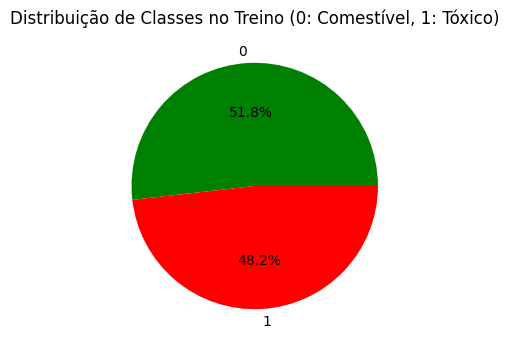

In [ ]:
# @title Gráfico pie: ~48% comestíveis (verde), 52% tóxicos (vermelho).
plt.figure(figsize=(6, 4))
train_df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribuição de Classes no Treino (0: Comestível, 1: Tóxico)')
plt.ylabel('')
plt.show()

Componentes PCA: 59, Variância explicada: 0.951


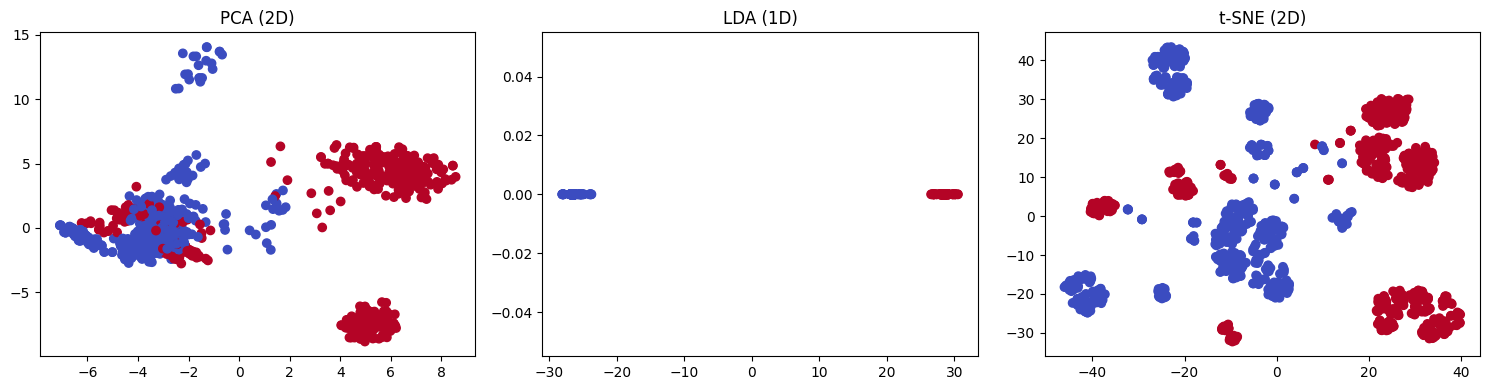

In [ ]:
# @title  PCA: mantém 95% da variância (resumo dos dados). LDA: separa as classes em 1 dimensão. t-SNE: mostra agrupamentos em 2D.

#PCA mostra como resumir os dados mantendo a variância.
#LDA mostra como destacar a separação entre classes (usando rótulos).
#t-SNE mostra agrupamentos ocultos de forma visual.
#LDA mostra como destacar a separação entre classes (usando rótulos).
#t-SNE mostra agrupamentos ocultos de forma visual.


scaler = StandardScaler()
X_scaled_std = scaler.fit_transform(X_train_encoded)


pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled_std)
print(f"Componentes PCA: {X_pca.shape[1]}, Variância explicada: {pca.explained_variance_ratio_.sum():.3f}")

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled_std, y_train)


tsne_samples = 1000
X_tsne_subset = X_scaled_std[:tsne_samples]
y_tsne_subset = y_train[:tsne_samples]


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tsne_subset)


plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:tsne_samples, 0], X_pca[:tsne_samples, 1], c=y_tsne_subset, cmap='coolwarm')
plt.title('PCA (2D)')
plt.subplot(1, 3, 2)
plt.scatter(X_lda[:tsne_samples], np.zeros(tsne_samples), c=y_tsne_subset, cmap='coolwarm')
plt.title('LDA (1D)')
plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_tsne_subset, cmap='coolwarm')
plt.title('t-SNE (2D)')
plt.tight_layout()
plt.show()